In [4]:
import pandas as pd


# ARXIV data


In [5]:
data_arxiv = pd.read_csv("arxiv_ai.csv")

In [6]:
data_arxiv.head()

,authors,categories,comment,doi,entry_id,journal_ref,pdf_url,primary_category,published,summary,title,updated
0,[arxiv.Result.Author('M. L. Ginsberg')],['cs.AI'],See http://www.jair.org/ for an online appendi...,NaN,http://arxiv.org/abs/cs/9308101v1,"Journal of Artificial Intelligence Research, V...",http://arxiv.org/pdf/cs/9308101v1,cs.AI,1993-08-01 00:00:00+00:00,Because of their occasional need to return to ...,Dynamic Backtracking,1993-08-01 00:00:00+00:00
1,[arxiv.Result.Author('M. P. Wellman')],['cs.AI'],See http://www.jair.org/ for any accompanying ...,NaN,http://arxiv.org/abs/cs/9308102v1,"Journal of Artificial Intelligence Research, V...",http://arxiv.org/pdf/cs/9308102v1,cs.AI,1993-08-01 00:00:00+00:00,Market price systems constitute a well-underst...,A Market-Oriented Programming Environment and ...,1993-08-01 00:00:00+00:00
2,"[arxiv.Result.Author('I. P. Gent'), arxiv.Resu...",['cs.AI'],See http://www.jair.org/ for any accompanying ...,NaN,http://arxiv.org/abs/cs/9309101v1,"Journal of Artificial Intelligence Research, V...",http://arxiv.org/pdf/cs/9309101v1,cs.AI,1993-09-01 00:00:00+00:00,We describe an extensive study of search in GS...,An Empirical Analysis of Search in GSAT,1993-09-01 00:00:00+00:00
3,"[arxiv.Result.Author('F. Bergadano'), arxiv.Re...",['cs.AI'],See http://www.jair.org/ for any accompanying ...,NaN,http://arxiv.org/abs/cs/9311101v1,"Journal of Artificial Intelligence Research, V...",http://arxiv.org/pdf/cs/9311101v1,cs.AI,1993-11-01 00:00:00+00:00,As real logic programmers normally use cut (!)...,The Difficulties of Learning Logic Programs wi...,1993-11-01 00:00:00+00:00
4,"[arxiv.Result.Author('J. C. Schlimmer'), arxiv...",['cs.AI'],See http://www.jair.org/ for an online appendi...,NaN,http://arxiv.org/abs/cs/9311102v1,"Journal of Artificial Intelligence Research, V...",http://arxiv.org/pdf/cs/9311102v1,cs.AI,1993-11-01 00:00:00+00:00,To support the goal of allowing users to recor...,Software Agents: Completing Patterns and Const...,1993-11-01 00:00:00+00:00


In [7]:
data_arxiv.describe()

,authors,categories,comment,doi,entry_id,journal_ref,pdf_url,primary_category,published,summary,title,updated
count,10000,10000,6136,1389,10000,2028,10000,10000,10000,10000,10000,10000
unique,8614,918,4088,1387,10000,2010,10000,51,9876,9992,9980,9876
top,[arxiv.Result.Author('Joseph Y. Halpern')],['cs.AI'],See http://www.jair.org/ for any accompanying ...,10.4114/intartif.vol22iss64pp47-62,http://arxiv.org/abs/cs/9308101v1,"Journal of Computing, Vol. 2, No. 6, June 2010...",http://arxiv.org/pdf/cs/9308101v1,cs.AI,2012-02-14 16:41:17+00:00,Mutual information is widely used in artificia...,Defining Relative Likelihood in Partially-Orde...,2012-02-14 16:41:17+00:00
freq,18,7770,81,2,1,5,1,9280,35,2,2,35


In [8]:
data_arxiv['authors'][2].replace('[','')

"arxiv.Result.Author('I. P. Gent'), arxiv.Result.Author('T. Walsh')]"

In [9]:
data_arxiv['authors'][2].replace(']','')

"[arxiv.Result.Author('I. P. Gent'), arxiv.Result.Author('T. Walsh')"

In [10]:
data_arxiv['authors_list'] = [
    [item.strip() for item in s.strip('[]').split(',')]
    for s in data_arxiv['authors']
]

In [11]:
data_arxiv['authors_list'][5]

["arxiv.Result.Author('M. Buchheit')",
 "arxiv.Result.Author('F. M. Donini')",
 "arxiv.Result.Author('A. Schaerf')"]

In [12]:
data_arxiv.head(1)

,authors,categories,comment,doi,entry_id,journal_ref,pdf_url,primary_category,published,summary,title,updated,authors_list
0,[arxiv.Result.Author('M. L. Ginsberg')],['cs.AI'],See http://www.jair.org/ for an online appendi...,NaN,http://arxiv.org/abs/cs/9308101v1,"Journal of Artificial Intelligence Research, V...",http://arxiv.org/pdf/cs/9308101v1,cs.AI,1993-08-01 00:00:00+00:00,Because of their occasional need to return to ...,Dynamic Backtracking,1993-08-01 00:00:00+00:00,[arxiv.Result.Author('M. L. Ginsberg')]


# Очистка

Все данные уникальны

In [13]:
data_arxiv = data_arxiv.dropna(subset=['summary'])
data_arxiv = data_arxiv[data_arxiv['summary'] != '']
data_arxiv = data_arxiv[data_arxiv['pdf_url'] != '']
data_arxiv = data_arxiv.dropna(subset=['pdf_url'])


In [14]:
len(data_arxiv['entry_id'].unique())

10000

# NIPS data

In [15]:
data_nips = pd.read_csv("papers.csv")

In [16]:
data_nips.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [17]:
data_nips.shape

(7241, 7)

In [18]:
data_nips.describe()

,id,year
count,7241.000000,7241.000000
mean,3655.912167,2006.439718
std,2098.435219,8.759919
min,1.000000,1987.000000
25%,1849.000000,2000.000000
50%,3659.000000,2009.000000
75%,5473.000000,2014.000000
max,7284.000000,2017.000000


In [19]:
full_paper_nips = data_nips.dropna(subset=['paper_text'])
full_paper_nips = data_nips[data_nips['paper_text'] != '']


In [20]:
abstract_nips = data_nips.dropna(subset=['abstract'])
abstract_nips = data_nips[data_nips['abstract'] != 'Abstract Missing']
abstract_nips = data_nips[data_nips['abstract'] != '']


In [21]:
data_nips[data_nips['abstract'] == 'Abstract Missing']

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
...,...,...,...,...,...,...,...
7236,994,1994,Single Transistor Learning Synapses,NaN,994-single-transistor-learning-synapses.pdf,Abstract Missing,Single Transistor Learning Synapses\n\nPaul Ha...
7237,996,1994,"Bias, Variance and the Combination of Least Sq...",NaN,996-bias-variance-and-the-combination-of-least...,Abstract Missing,"Bias, Variance and the Combination of\nLeast S..."
7238,997,1994,A Real Time Clustering CMOS Neural Engine,NaN,997-a-real-time-clustering-cmos-neural-engine.pdf,Abstract Missing,A Real Time Clustering CMOS\nNeural Engine\nT....
7239,998,1994,Learning direction in global motion: two class...,NaN,998-learning-direction-in-global-motion-two-cl...,Abstract Missing,Learning direction in global motion: two\nclas...


In [22]:
data_nips[data_nips['abstract'] != 'Abstract Missing']

,id,year,title,event_type,pdf_name,abstract,paper_text
941,1861,2000,Algorithms for Non-negative Matrix Factorization,NaN,1861-algorithms-for-non-negative-matrix-factor...,Non-negative matrix factorization (NMF) has pr...,Algorithms for Non-negative Matrix\nFactorizat...
1067,1975,2001,Characterizing Neural Gain Control using Spike...,NaN,1975-characterizing-neural-gain-control-using-...,Spike-triggered averaging techniques are effec...,Characterizing neural gain control using\nspik...
2384,3163,2007,Competition Adds Complexity,NaN,3163-competition-adds-complexity.pdf,It is known that determinining whether a DEC-P...,Competition adds complexity\n\nJudy Goldsmith\...
2385,3164,2007,Efficient Principled Learning of Thin Junction...,NaN,3164-efficient-principled-learning-of-thin-jun...,We present the first truly polynomial algorith...,Efficient Principled Learning of Thin Junction...
2388,3167,2007,Regularized Boost for Semi-Supervised Learning,NaN,3167-regularized-boost-for-semi-supervised-lea...,Semi-supervised inductive learning concerns ho...,Regularized Boost for Semi-Supervised Learning...
...,...,...,...,...,...,...,...
6943,7280,2017,"On Separability of Loss Functions, and Revisit...",Poster,7280-on-separability-of-loss-functions-and-rev...,We revisit the classical analysis of generativ...,"On Separability of Loss Functions, and Revisit..."
6944,7281,2017,Maxing and Ranking with Few Assumptions,Poster,7281-maxing-and-ranking-with-few-assumptions.pdf,PAC maximum ...,Maxing and Ranking with Few Assumptions\nMoein...
6945,7282,2017,On clustering network-valued data,Poster,7282-on-clustering-network-valued-data.pdf,"Community detection, which focuses on clusteri...",On clustering network-valued data\n\nSoumendu ...
6946,7283,2017,A General Framework for Robust Interactive Lea...,Poster,7283-a-general-framework-for-robust-interactiv...,We propose a general framework for interactive...,A General Framework for Robust Interactive\nLe...


In [23]:
abstract_nips.shape

(7241, 7)

Все элементы уникальны

In [24]:
len(data_nips['title'].unique())

7241

# Подготовка 

In [25]:
authors_papers = pd.read_csv('paper_authors.csv')  # id,paper_id,author_id
authors = pd.read_csv('authors.csv')  # id,name 
paper_authors = authors_papers.merge(
    authors, 
    left_on='author_id', 
    right_on='id', 
    suffixes=('_link', '_author')
)
authors = authors.dropna(subset=['name'])
authors_papers = authors_papers.dropna(subset=['author_id'])

# Создаем строку "имя (id)" для каждого автора
paper_authors['author_with_id'] = paper_authors['name'] + ' (' + paper_authors['author_id'].astype(str) + ')'

# Группируем по paper_id и создаем список авторов
authors_lists = paper_authors.groupby('paper_id')['author_with_id'].apply(list).reset_index()
authors_lists.columns = ['paper_id', 'authors_list']

# Добавляем столбец authors_list к таблице papers
papers_with_authors = data_nips.merge(
    authors_lists, 
    left_on='id', 
    right_on='paper_id', 
    how='left'
)

# Удаляем лишний столбец paper_id если нужно
papers_with_authors = papers_with_authors.drop('paper_id', axis=1)


In [26]:
papers_with_authors

,id,year,title,event_type,pdf_name,abstract,paper_text,authors_list
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,"[Hisashi Suzuki (1), Suguru Arimoto (2)]"
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,[Christopher L. Scofield (14)]
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,"[Patric K. Stanton (155), Terrence J. Sejnowsk..."
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...,"[Gerhard Paass (902), J?rg Kindermann (1229)]"
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a...","[Anders Krogh (371), Jesper Vedelsby (1230)]"
...,...,...,...,...,...,...,...,...
7236,994,1994,Single Transistor Learning Synapses,NaN,994-single-transistor-learning-synapses.pdf,Abstract Missing,Single Transistor Learning Synapses\n\nPaul Ha...,"[Paul E. Hasler (1148), Chris Diorio (1149), B..."
7237,996,1994,"Bias, Variance and the Combination of Least Sq...",NaN,996-bias-variance-and-the-combination-of-least...,Abstract Missing,"Bias, Variance and the Combination of\nLeast S...",[Ronny Meir (189)]
7238,997,1994,A Real Time Clustering CMOS Neural Engine,NaN,997-a-real-time-clustering-cmos-neural-engine.pdf,Abstract Missing,A Real Time Clustering CMOS\nNeural Engine\nT....,"[Teresa Serrano-Gotarredona (1223), Bernab? Li..."
7239,998,1994,Learning direction in global motion: two class...,NaN,998-learning-direction-in-global-motion-two-cl...,Abstract Missing,Learning direction in global motion: two\nclas...,"[V. Sundareswaran (1226), Lucia M. Vaina (1227)]"


In [27]:
combined_authors = pd.concat([
    data_arxiv[['authors_list']], 
    papers_with_authors[['authors_list']]
], ignore_index=True)

In [28]:
combined_authors.shape

(17241, 1)

In [29]:
combined_authors['authors_list']

0                  [arxiv.Result.Author('M. L. Ginsberg')]
1                   [arxiv.Result.Author('M. P. Wellman')]
2        [arxiv.Result.Author('I. P. Gent'), arxiv.Resu...
3        [arxiv.Result.Author('F. Bergadano'), arxiv.Re...
4        [arxiv.Result.Author('J. C. Schlimmer'), arxiv...
                               ...                        
17236    [Paul E. Hasler (1148), Chris Diorio (1149), B...
17237                                   [Ronny Meir (189)]
17238    [Teresa Serrano-Gotarredona (1223), Bernab? Li...
17239     [V. Sundareswaran (1226), Lucia M. Vaina (1227)]
17240    [Trevor Darrell (678), Irfan A. Essa (1228), A...
Name: authors_list, Length: 17241, dtype: object

In [30]:
combined_authors.shape

(17241, 1)

# Аналитика

Графики:
- Распределение авторов для статей
- Распределение статей для авторов
- распределение числа работ у колле(всех встречающихся чаще одного раза)
- статистика по самоцитированию
- Доли авторства статей (индивидуальные, пары, средние команды, до 6, крупные)
- Средние и медианы:
    - Число статей у автора
    - Число авторов у статьи
    - Размеры коллектива

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
filtered_authors = combined_authors.dropna(subset=['authors_list'])

In [33]:
filtered_authors.shape

(17238, 1)

### Распределение авторов для статей


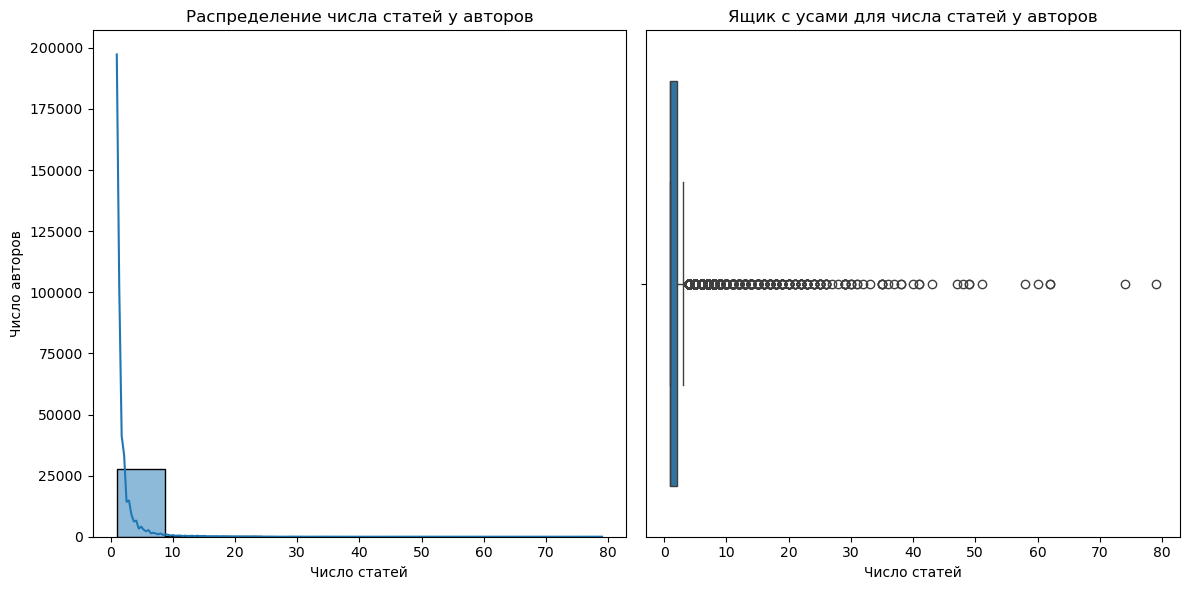

In [34]:
all_authors = []

for authors in filtered_authors['authors_list']:
    for author in authors:
        all_authors.append(author)

# Считаем количество статей для каждого автора
author_counts = pd.Series(all_authors).value_counts()

# Строим графики
plt.figure(figsize=(12, 6))

# График распределения
plt.subplot(1, 2, 1)
sns.histplot(author_counts, bins=10, kde=True)
plt.title('Распределение числа статей у авторов')
plt.xlabel('Число статей')
plt.ylabel('Число авторов')

# График "ящик с усами"
plt.subplot(1, 2, 2)
sns.boxplot(x=author_counts)
plt.title('Ящик с усами для числа статей у авторов')
plt.xlabel('Число статей')

plt.tight_layout()
plt.show()

### Распределение статей для авторов

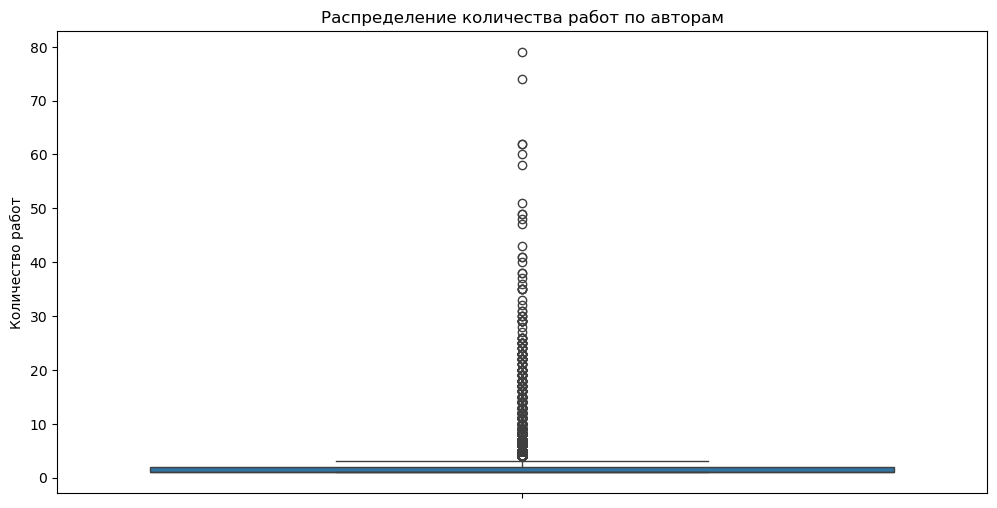

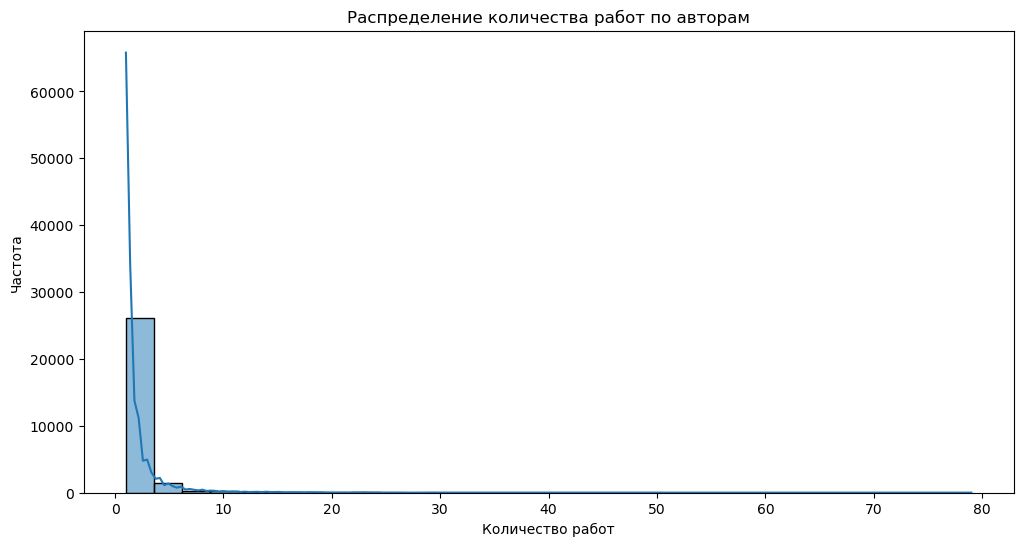

In [35]:
authors_exp = filtered_authors.explode('authors_list')

author_counts = authors_exp['authors_list'].value_counts().reset_index()
author_counts.columns = ['author', 'paper_count']

# Строим Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=author_counts, y='paper_count')
plt.title('Распределение количества работ по авторам')
plt.ylabel('Количество работ')
plt.show()

# Строим гистограмму распределения
plt.figure(figsize=(12, 6))
sns.histplot(data=author_counts, x='paper_count', bins=30, kde=True)
plt.title('Распределение количества работ по авторам')
plt.xlabel('Количество работ')
plt.ylabel('Частота')
plt.show()

### Медиана и среднее число работ у автора

In [36]:
mean = author_counts['paper_count'].mean()
median = author_counts['paper_count'].median()
print(f"Медиана - {median}, среднее - {mean}")

Медиана - 1.0, среднее - 1.7864398439422164


In [37]:
author_counts[author_counts['paper_count'] > median].count()


author         7783
paper_count    7783
dtype: int64

### Статистика по авторам с больше чем одной работой

In [38]:
authors_often = author_counts[author_counts['paper_count'] > median]

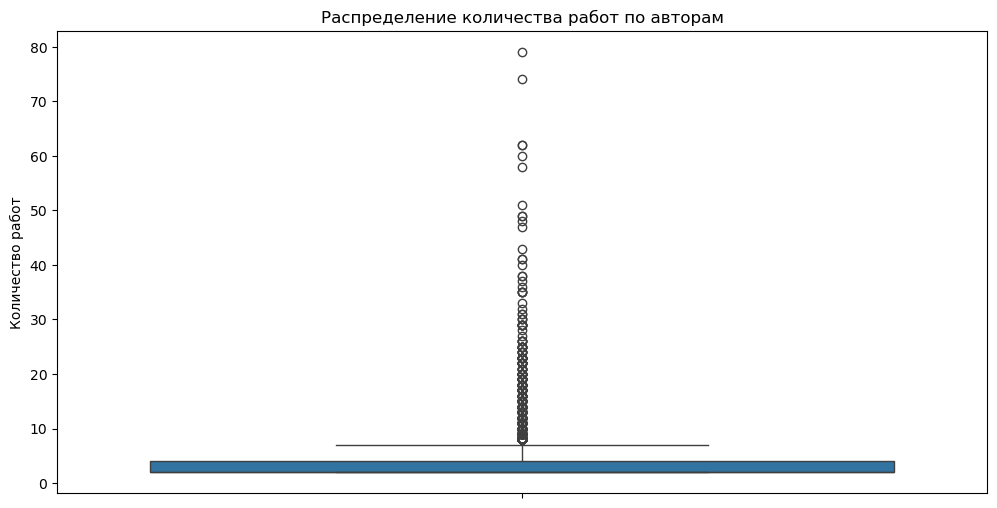

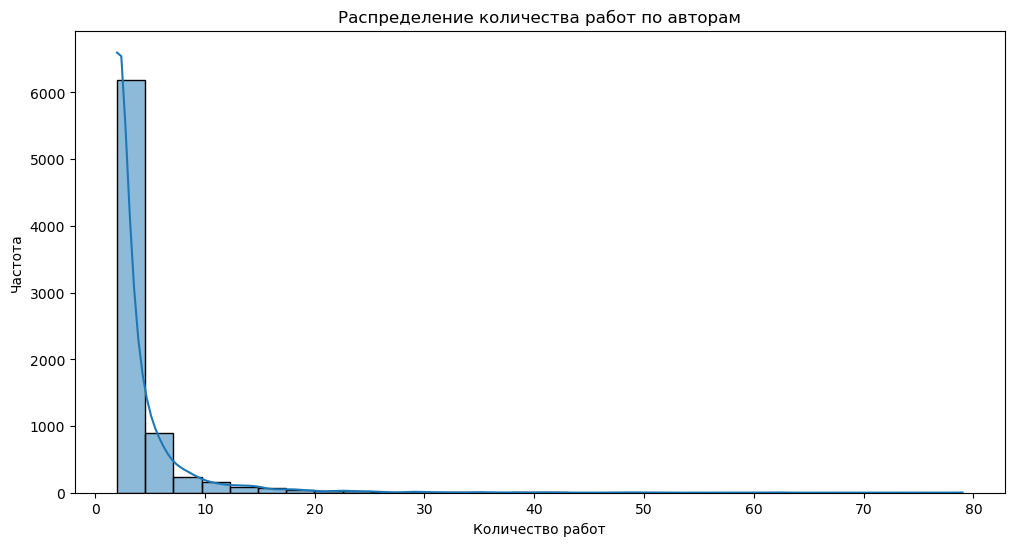

In [39]:
# Строим Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=authors_often, y='paper_count')
plt.title('Распределение количества работ по авторам')
plt.ylabel('Количество работ')
plt.show()

# Строим гистограмму распределения
plt.figure(figsize=(12, 6))
sns.histplot(data=authors_often, x='paper_count', bins=30, kde=True)
plt.title('Распределение количества работ по авторам')
plt.xlabel('Количество работ')
plt.ylabel('Частота')
plt.show()

In [40]:
mean = authors_often['paper_count'].mean()
median = authors_often['paper_count'].median()
print(f"Медиана - {median}, среднее - {mean}")

Медиана - 2.0, среднее - 3.8748554541950404


### Распределение команд по числу работ

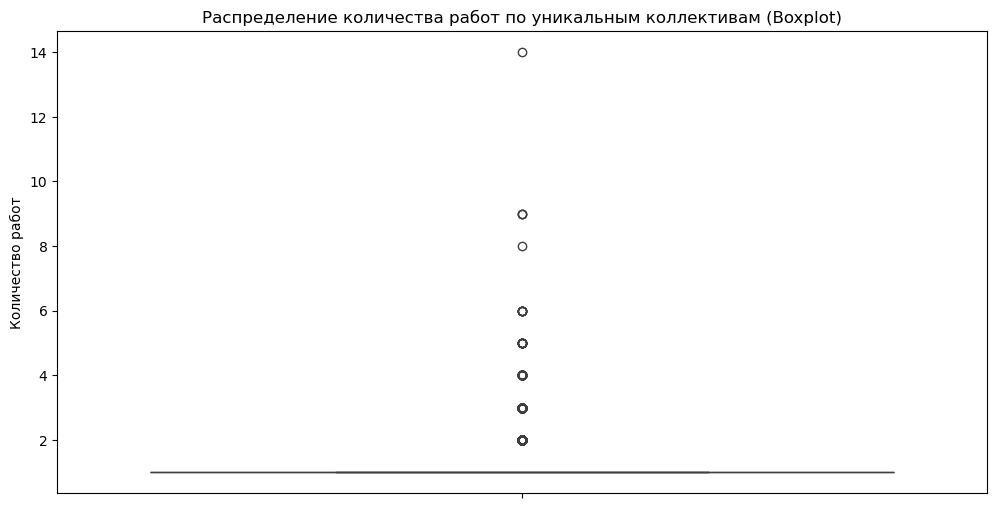

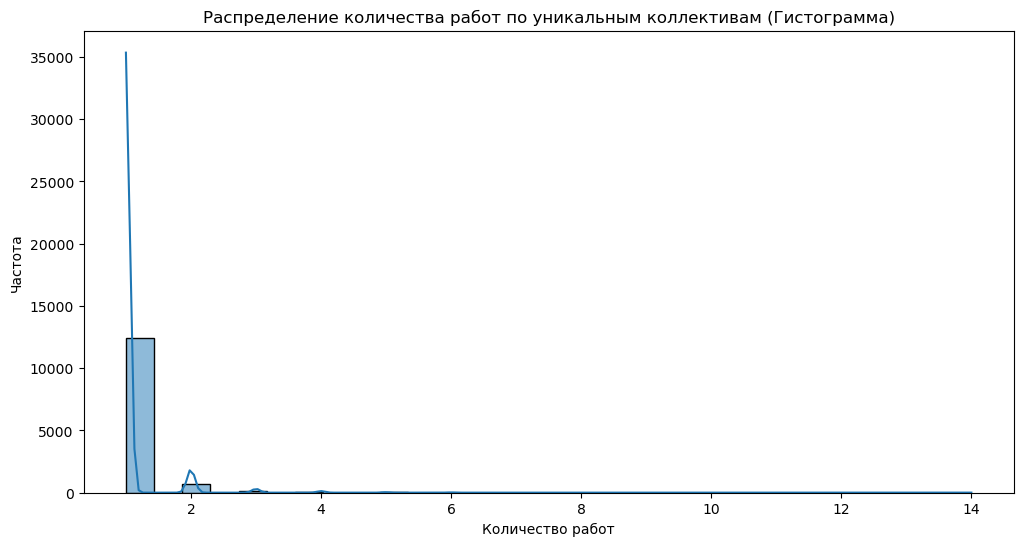

In [41]:
# Фильтруем работы, где количество авторов > 1
collectives = filtered_authors[filtered_authors['authors_list'].apply(len) > 1].copy()

# Создаём уникальный идентификатор для каждого коллектива авторов
collectives.loc[:, 'author_team'] = collectives['authors_list'].apply(
    lambda x: tuple(sorted([a for a in x if pd.notna(a)]))  # Фильтруем NaN внутри списка
)

# Считаем количество работ для каждого уникального коллектива
team_counts = collectives['author_team'].value_counts().reset_index()
team_counts.columns = ['author_team', 'paper_count']

# Boxplot для уникальных коллективов
plt.figure(figsize=(12, 6))
sns.boxplot(data=team_counts, y='paper_count')
plt.title('Распределение количества работ по уникальным коллективам (Boxplot)')
plt.ylabel('Количество работ')
plt.show()

# Гистограмма для уникальных коллективов
plt.figure(figsize=(12, 6))
sns.histplot(data=team_counts, x='paper_count', bins=30, kde=True)
plt.title('Распределение количества работ по уникальным коллективам (Гистограмма)')
plt.xlabel('Количество работ')
plt.ylabel('Частота')
plt.show()

In [42]:
team_counts.shape

(13272, 2)

In [43]:
team_counts['paper_count'].describe()

count    13272.000000
mean         1.086197
std          0.405986
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: paper_count, dtype: float64

### Диаграмма размеров команд

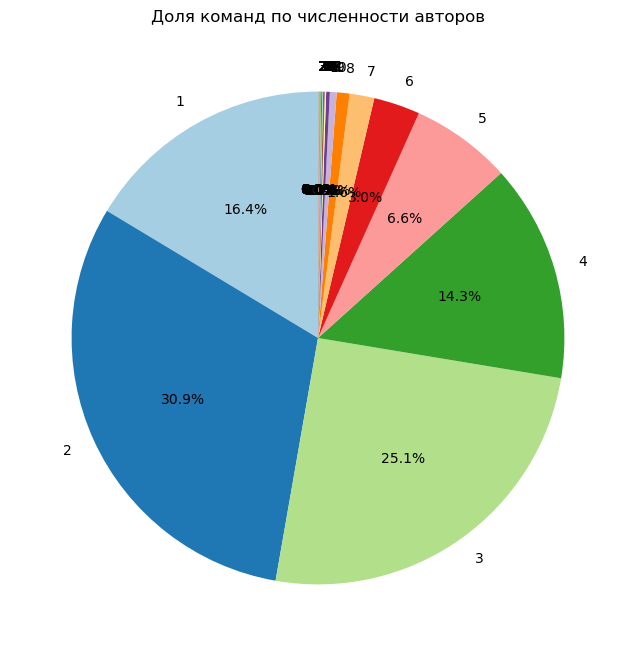

In [44]:
# Посчитать количество команд для каждой численности
team_sizes = filtered_authors['authors_list'].apply(len)
size_counts = team_sizes.value_counts().sort_index()

# Построить круговую диаграмму
plt.figure(figsize=(10, 8))
plt.pie(
    size_counts,
    labels=size_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Доля команд по численности авторов')
plt.show()


In [45]:
team_sizes.max()

74

In [46]:
size_counts

authors_list
1     2822
2     5322
3     4334
4     2463
5     1139
6      525
7      280
8      144
9       77
10      41
11      15
12      19
13      10
14      11
15       7
16       6
17       5
18       4
19       2
20       2
21       3
22       2
23       1
28       1
30       1
72       1
74       1
Name: count, dtype: int64

In [59]:
arxiv_text = pd.read_csv('results.csv')
arxiv_text.shape


(9808, 2)

In [60]:
arxiv_text.head()

,id,full_text
0,0,J o u r n a l o f A r t i(cid:12) c ia l I n t...
1,1,J o u r n a l o f A r t i(cid:12) c ia l I n t...
2,2,J o u r n a l o f A r t i(cid:12) c ia l I n t...
3,3,J o u r n a l o f A r t i(cid:12) c ia l I n t...
4,4,Journal of Artificial Intelligence Research 1 ...


In [61]:
len(arxiv_text['id'].unique())

9808

Объединение датасетов с текстами

In [69]:
df1_text = data_nips[['paper_text']].rename(columns={'paper_text': 'text'})
df2_text = arxiv_text[['full_text']].rename(columns={'full_text': 'text'})

# Объединяем датафреймы
combined_df = pd.concat([df1_text, df2_text], ignore_index=True)


In [70]:
combined_df

,text
0,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,Bayesian Query Construction for Neural\nNetwor...
4,"Neural Network Ensembles, Cross\nValidation, a..."
...,...
17044,"Barcelona, 8-9 September 2011\nILexicOn: towar..."
17045,Transmission of distress in a bank credit netw...
17046,2011 Fourth IEEE International Conference on U...
17047,5102\nyaM\n41\n]OL.sc[\n3v9585.4021:viXra\nOn ...


# Подготовка данных (лемматизация, стемминг, удаление стоп слов)

Full texts

In [ ]:
from tools import TextProcessor

In [ ]:
combined_df['processed_text'] = combined_df['text'].apply(TextProcessor.process_text)


# Методы выделения ключевых слов и именованных сущностей

№

In [2]:
from tools import TaxoGen
from tools import Vectorizers
vectorizers = {
    "Word2Vec" : Vectorizers.Word2VecVectorizer(),
    "Bert" : Vectorizers.BertVectorizer()
}

generator_w2v = TaxoGen.TaxoGen()
generator_bert = TaxoGen.TaxoGen()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\Vizor\anaconda3\envs\NIRS\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Vizor\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Преобразование документов в векторы

In [1]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_vector(words):
    sentence = ' '.join(words)
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()


c:\Users\Vizor\anaconda3\envs\NIRS\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Vizor\anaconda3\envs\NIRS\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Vizor\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer m

# Методы кластеризации

# Оценка качества кластеризации

# Построение онтологии

### Метод TaxoGen

### TaxoGenDRK

# Pipeline

# Черновики/drafts